# Model Comparison

- Compare Prophet, ARIMA, and LSTM models on forecasting performance
- Load and visualize standardized metrics
- Generate performance plots: table, bar charts, line predictions
- Discuss trade-offs: accuracy, interpretability, computational cost
- Final recommendation for deployment


Metrics for comparison:

**MAE (Mean Absolute Error):** The average of the absolute differences between actual and predicted values. Lower is better.

**MSE (Mean Squared Error):** The average of the squared differences between actual and predicted values. Penalizes larger errors more. Lower is better.

**RMSE (Root Mean Squared Error):** The square root of MSE. It’s in the same units as your original data, making interpretation easier. Lower is better.

**MAPE (Mean Absolute Percentage Error):** The average of absolute percentage errors between actual and predicted values. Expressed as a percentage. Lower is better.

**R² (R-squared):** The proportion of variance in the actual values explained by the model. Ranges from 0 to 1 (or negative if model is very bad). Closer to 1 is better.

### 1.Imports and setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

sns.set(style="whitegrid")

# Define paths
metrics_dir = "../results"
models = ["prophet", "arima", "lstm"]

### 2.Load evaluation metrics

In [2]:
all_metrics = []

for model in models:
    with open(os.path.join(metrics_dir, f"{model}_results.json"), 'r') as f:
        data = json.load(f)
        metrics = data["metrics"]
        metrics["Model"] = model.upper()
        all_metrics.append(metrics)

df_metrics = pd.DataFrame(all_metrics).set_index("Model")
df_metrics = df_metrics[["MAE", "MSE", "RMSE", "MAPE", "R2"]].round(3)
df_metrics

,MAE,MSE,RMSE,MAPE,R2
Model,,,,,
PROPHET,420.366,282848.540,531.835,5.650,0.842
ARIMA,600.154,560160.339,748.439,7.362,0.687
LSTM,205.293,130414.756,361.130,20.525,0.926


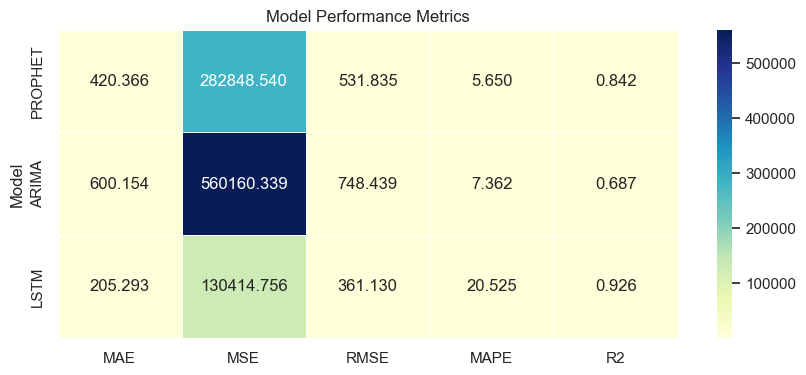

In [3]:
plt.figure(figsize=(10, 4))
sns.heatmap(df_metrics, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=0.5)
plt.title("Model Performance Metrics")
plt.show()

#### 3.Compare predictions visually

In [4]:
preds = {}
for model in models:
    df_pred = pd.read_csv(os.path.join(metrics_dir, f"{model}_predictions.csv"))
    df_pred['ds'] = pd.to_datetime(df_pred['ds'])
    preds[model] = df_pred

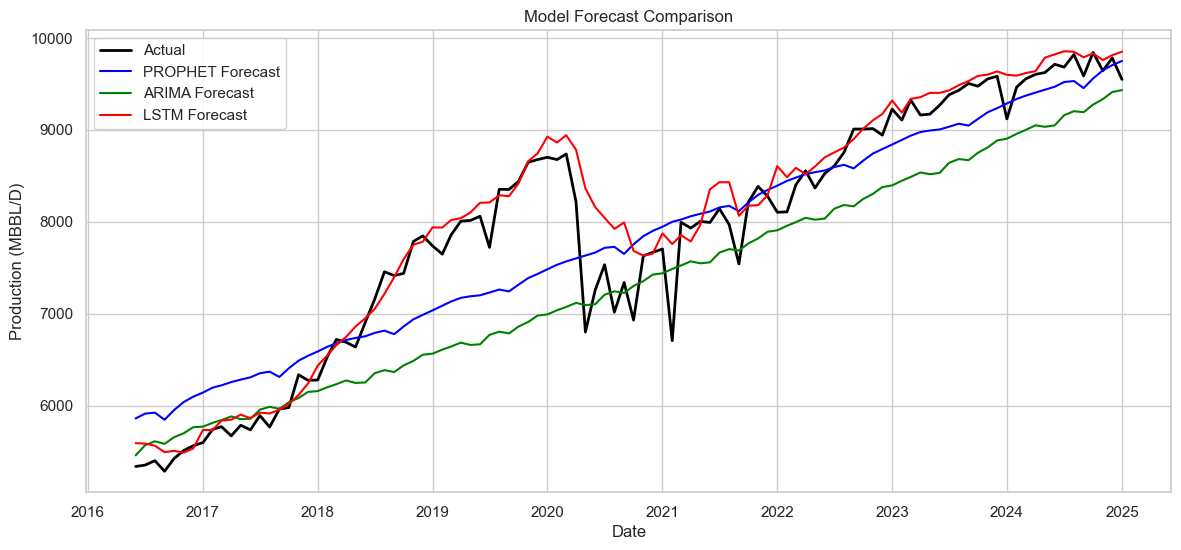

In [5]:
plt.figure(figsize=(14,6))
plt.plot(preds['prophet']['ds'], preds['prophet']['y_true'], label='Actual', color='black', linewidth=2)

for model, color in zip(['prophet', 'arima', 'lstm'], ['blue', 'green', 'red']):
    plt.plot(preds[model]['ds'], preds[model]['y_pred'], label=f"{model.upper()} Forecast", color=color)

plt.title("Model Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Production (MBBL/D)")
plt.legend()
plt.show()


### 4.Load best hyperparameters

In [11]:
params = {}
for model in models:
    with open(f"../models/{model}_best_params.json", "r") as f:
        params[model.upper()] = json.load(f)

pd.DataFrame(params)

,PROPHET,ARIMA,LSTM
changepoint_prior_scale,0.475021,NaN,NaN
seasonality_prior_scale,0.033542,NaN,NaN
holidays_prior_scale,8.521256,NaN,NaN
p,NaN,1.0,NaN
d,NaN,2.0,NaN
q,NaN,5.0,NaN
P,NaN,0.0,NaN
D,NaN,1.0,NaN
Q,NaN,1.0,NaN
units,NaN,NaN,73.000000


### 5.Interpretation and Recommendation

**Model Comparison Summary**
Based on the evaluation metrics, we observe:

- LSTM achieves the lowest RMSE and MAE, indicating best predictive performance.
- ARIMA performs well but shows limitations during sharp transitions.
- Prophet is interpretable and performs competitively, ideal for quick deployment with strong visual tools.

**Final Recommendation:**
- For a production environment prioritizing accuracy, LSTM is preferred.
- For stakeholder transparency and fast explainability, Prophet is a strong candidate.
- ARIMA is a solid statistical benchmark but less adaptable to non-linear trends.

### 6.Save aggregated results

In [12]:
df_metrics.to_csv("../results/model_metrics_summary.csv")